# Prueba de Desempeño en Algoritmo de multiplicación de matrices cuadradas
Versión secuencial VS Versión Concurrente

## Selección de Método para medir el tiempo de CPU de Usuario
Se evaluarán primero algunas funciones para medir el tiempo y saber cuál es más precisa para determinar el tiempo de *CPU de usuario*

### Prueba 1 algoritmo secuencial usando time.perf_counter()

In [ ]:
import random, time
from resource import getrusage as resource_usage, RUSAGE_SELF
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
acum = 0
tic = time.perf_counter()
for i in range(200000):
    acum+= i
toc = time.perf_counter()
print(f"Sum in {toc - tic:0.12f} seconds")


### Prueba 2 algoritmo secuencial usando resource_usage
 'real': end_time - start_time, \
 'sys': end_resources.ru_stime - start_resources.ru_stime, 
 ##### 'user': end_resources.ru_utime - start_resources.ru_utime

In [1]:
acum = 0
start_resources = resource_usage(RUSAGE_SELF)
for i in range(200000):
    acum+= i
end_resources = resource_usage(RUSAGE_SELF)
timeCPU = end_resources.ru_utime - start_resources.ru_utime
print("Sum in {0:.10f} seconds".format(timeCPU))

#print('Result:')
#for r in result:
  # print(r)

NameError: name 'resource_usage' is not defined

Nota: Para este laboratorio se elegirá resource_usage, ya que aisla de una mejor forma el tiempo de CPU de usuario





# Algoritmo para Multiplicación de Matrices

## Algoritmo secuencial

Definición de las Funciones que se usarán

In [ ]:
def reset_to_0(the_array):
    for i, e in enumerate(the_array):
        if isinstance(e, list):
            reset_to_0(e)
        else:
            the_array[i] = 0

#Create matrix
def createMatrix(n):
    a =[]
    b =[]
    r= []
    matrix1 =[]
    matrix2 =[]
    result = []

    for i in range(n):
        for i in range(n):
            number = random.randrange(10)
            number2 = random.randrange(10)
            a.append(number)
            b.append(number2)
            r.append(0)
        matrix1.append(a)
        matrix2.append(b)
        result.append(r)
        a = []
        b = []
        r = []
    return matrix1, matrix2, result

#Prueba de verificacion. No se recomienda su ejecucion para n>10
# print('Matrix 1')
# for m in matrix1:
#     print(m)

# print('Matrix 2')
# for m in matrix2:
#     print(m)

#Multiply Matrix
def multiplyMatrix(matrix1, matrix2, result):
    start_resources = resource_usage(RUSAGE_SELF)
    #iterate through rows of matrix1
    for i in range(n):
       # iterate through columns of matrix2
       for j in range(n):
           # iterate through rows of matrix2
           for k in range(n):
               result[i][j] += matrix1[i][k] * matrix2[k][j]
    end_resources = resource_usage(RUSAGE_SELF)
    timeCPU = end_resources.ru_utime - start_resources.ru_utime
    # print("Matrix multiplication in {0:.10f} seconds".format(timeCPU))
    return timeCPU

# Average Function
def average(list): 
    return sum(list) / len(list)

def averageTime(list1, list2, list3, list4,list5,list6,list7,list8):
    return [average(list1), average(list2), average(list3),average(list4),average(list5),average(list6),average(list7),average(list8) ]

def makeChart(xAxis,yAxis):
    plt.bar(xAxis,yAxis, width=3)
    plt.plot(matrixSizeN, averageTimeList, color='red')
    plt.title('Matrix Size Vs Average CPU User time')
    plt.xlabel('Matrix Size (N)')
    plt.ylabel('Time (in s)')
    plt.grid(alpha=.7)
    plt.show()

In [ ]:

# Main function:
if __name__ == "__main__":

    # Values for n
    matrixSizeN = [100,120,140,160,180,200,220,240]
    size100 = []
    size120 = []
    size140 = []
    size160 = []
    size180 = []
    size200 = []
    size220 = []
    size240 = []

    for i in range (10):
        for n in matrixSizeN:
            matrix1, matrix2, result = createMatrix(n)
            time = multiplyMatrix(matrix1, matrix2, result)
            # print('Multi matrix size: {} . Loop: {} .Time: {}'.format(n,i, time))

            if n== 100:
                size100.append(time)
            elif n == 120:
                size120.append(time)
            elif n == 140:
                size140.append(time)
            elif n == 160:
                size160.append(time)
            elif n == 180:
                size180.append(time)
            elif n == 200:
                size200.append(time)
            elif n == 220:
                size220.append(time)
            elif n == 240:
                size240.append(time)
            else:
                print('Error')
    # print(size100)
    # print(size120)
    # print(size140)

   

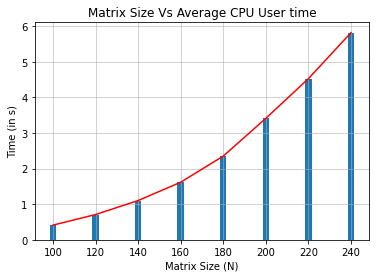

In [13]:
 # xAxis = averageTime    yAxis = matrixSize
averageTimeList = averageTime(size100, size120, size140, size160, size180,size200,size220,size240 )
# makeChart(xAxis,yAxis)
makeChart(matrixSizeN, averageTimeList)

In [15]:
print(matrixSizeN)
print(averageTimeList)

[100, 120, 140, 160, 180, 200, 220, 240]
[0.4125, 0.709375, 1.103125, 1.6171875, 2.3515625, 3.4125, 4.5265625, 5.81875]


## Algoritmo Concurrente

Para poder implementarlo de manera concurrente vamos a usar hilos, con el fin de que la multiplicación por columnas se pueda realizar de manera simultanea. Es decir, un hilo se encarga de realizar la multiplicación en un rango específico de columnas mientras el otro lo hace con un rango distinto.
Para la librería de hilos usamos threading. Además, debemos definir una constante que contenga el número de hilos que vamos a utilizar


In [ ]:
from threading import Thread
NUM_OF_THREADS = 4

Debemos cambiar la manera en la que se realiza la multiplicación ya que no se recorren todas las filas, si no que se hacen en un rango especifico para cada hilo.

In [ ]:
def multiplyParallelMatrix(start, end):
    # iterate through rows of matrix1 int that were assigned o that thread
    for i in range(start, end):
        # iterate through columns of matrix2
        for j in range(n):
            # iterate through rows of matrix2
            for k in range(n):
                result[i][j] += matrix1[i][k] * matrix2[k][j]

Después creamos una función que hará el manejo de los hilos. Hará el cálculo de cuántas filas serán asignadas por hilo dividiendo el número de filas con el número de hilos. En caso de que la división no sea exacta y queden filas saltantes la variable offset nos indicará cuántas son para que el último hilo creado se encargue de ellas.
Adicionalmente dentro de la misma función se inician los hilos y se da la instrucción de espera para la sincronización de los mismos.

In [9]:
def threadFunction():
    global NUM_OF_THREADS
    global n
    thread_handle = []
    row_range = int(n/NUM_OF_THREADS)
    # Calculating the offset
    offset = n % NUM_OF_THREADS
    # Start time counting
    start_resources = resource_usage(RUSAGE_SELF)

    for j in range(0, NUM_OF_THREADS):

        # If the number if rows can be divided by the number of threads
        if offset == 0:
            t = Thread(target=multiplyParallelMatrix, args=(
                int((row_range) * j), int((row_range) * (j+1))))
        else:
            # if there are remaining rows
            if j == NUM_OF_THREADS - 1:
                t = Thread(target=multiplyParallelMatrix, args=(
                    int((row_range) * j), int(((row_range) * (j+1))+offset)))
            else:
                t = Thread(target=multiplyParallelMatrix, args=(
                    int((row_range) * j), int((row_range) * (j+1))))

        thread_handle.append(t)
        t.start()

    for j in range(0, NUM_OF_THREADS):
        thread_handle[j].join()

    # End time counting
    end_resources = resource_usage(RUSAGE_SELF)
    timeCPU = end_resources.ru_utime - start_resources.ru_utime
   # print("Sum in {0:.10f} seconds".format(timeCPU))
    return timeCPU



Dentro de esta función también se hará el conteo del tiempo de CPU de usuario teniendo en cuenta la barrera de sincronización 

In [12]:
# Main function:
if __name__ == "__main__":

    # Values for n
    matrixSizeN = [100,120,140,160,180,200,220,240]
    size100 = []
    size120 = []
    size140 = []
    size160 = []
    size180 = []
    size200 = []
    size220 = []
    size240 = []

    for i in range (10):
        for n in matrixSizeN:
            matrix1, matrix2, result = createMatrix(n)
            time = threadFunction()
            # print('Multi matrix size: {} . Loop: {} .Time: {}'.format(n,i, time))

            if n== 100:
                size100.append(time)
            elif n == 120:
                size120.append(time)
            elif n == 140:
                size140.append(time)
            elif n == 160:
                size160.append(time)
            elif n == 180:
                size180.append(time)
            elif n == 200:
                size200.append(time)
            elif n == 220:
                size220.append(time)
            elif n == 240:
                size240.append(time)
            else:
                print('Error')
    # print(size100)
    # print(size120)
    # print(size140)

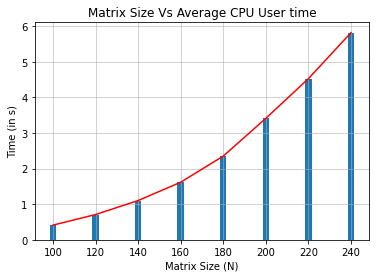

In [20]:
 # xAxis = averageTime    yAxis = matrixSize
averageParallelTimeList = averageTime(size100, size120, size140, size160, size180,size200,size220,size240 )
# makeChart(xAxis,yAxis)
makeChart(matrixSizeN, averageParallelTimeList)

In [21]:
print(matrixSizeN)
print(averageParallelTimeList)

[100, 120, 140, 160, 180, 200, 220, 240]
[0.4125, 0.709375, 1.103125, 1.6171875, 2.3515625, 3.4125, 4.5265625, 5.81875]


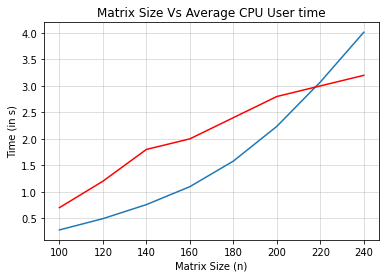

In [12]:
# This will be useful in the future :)
#plt.bar(matrixSizeN,averageTimeList)
plt.plot(matrixSizeN, averageTimeList)
plt.plot(matrixSizeN, [0.7,1.2,1.8,2,2.4,2.8,3,3.2], color='red')
plt.title('Matrix Size Vs Average CPU User time')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Time (in s)')
plt.grid(alpha=.5)
plt.show()